In [475]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime


In [476]:
df= pd.read_excel("data.xlsx")
print (df.shape)
print (df.columns)

(30940, 6)
Index(['Transaction_ID', 'Profile ID', 'Date_of_Booking',
       'Date_of_Service_Requested', 'Source',
       'Slot of Booking (Hour of the Day)'],
      dtype='object')


In [477]:
df.dtypes

Transaction_ID                               object
Profile ID                                    int64
Date_of_Booking                      datetime64[ns]
Date_of_Service_Requested            datetime64[ns]
Source                                       object
Slot of Booking (Hour of the Day)             int64
dtype: object

In [478]:
df.isnull().sum()

Transaction_ID                       0
Profile ID                           0
Date_of_Booking                      0
Date_of_Service_Requested            0
Source                               0
Slot of Booking (Hour of the Day)    0
dtype: int64

In [479]:
df.head()

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day)
0,BBCHH,1,2018-05-20,2018-05-21,D,14
1,CHWFD,1,2018-09-23,2018-09-23,C,8
2,DYDMF,2,2018-11-10,2018-11-13,C,11
3,EZYSA,3,2018-04-12,2018-04-16,B,8
4,HWAKX,3,2018-08-05,2018-08-06,B,11


In [480]:
df.rename(columns= {"Profile ID" : "Profile_ID"}, inplace= True)

In [481]:
df['sequence']= df.groupby('Profile_ID').cumcount()
df.describe()

,Profile_ID,Slot of Booking (Hour of the Day),sequence
count,30940.000000,30940.000000,30940.000000
mean,8329.657854,13.060440,2.145734
std,4807.274974,3.135142,4.571598
min,1.000000,6.000000,0.000000
25%,4142.750000,12.000000,0.000000
50%,8375.000000,14.000000,0.000000
75%,12432.000000,14.000000,2.000000
max,16711.000000,19.000000,55.000000


#  Question 1

Calculated month of booking to filter my data with ease

In [483]:
df['month_of_Booking'] = df['Date_of_Booking'].dt.month
print(df)

      Transaction_ID  Profile_ID Date_of_Booking Date_of_Service_Requested  \
0              BBCHH           1      2018-05-20                2018-05-21   
1              CHWFD           1      2018-09-23                2018-09-23   
2              DYDMF           2      2018-11-10                2018-11-13   
3              EZYSA           3      2018-04-12                2018-04-16   
4              HWAKX           3      2018-08-05                2018-08-06   
...              ...         ...             ...                       ...   
30935          FOXPU       16707      2018-09-29                2018-10-02   
30936          ZNKAO       16708      2018-03-12                2018-03-16   
30937          INBOS       16709      2018-01-05                2018-01-10   
30938          CUNOS       16710      2018-02-26                2018-03-03   
30939          DUBEV       16711      2018-04-30                2018-05-03   

      Source  Slot of Booking (Hour of the Day)  sequence  mont

In [484]:
g = df.groupby('month_of_Booking').Profile_ID.nunique()
print(g)

month_of_Booking
1     2324
2     2115
3     2248
4     2188
5     2189
6     2241
7     2290
8     2228
9     2200
10    2352
11    2276
12    2424
Name: Profile_ID, dtype: int64


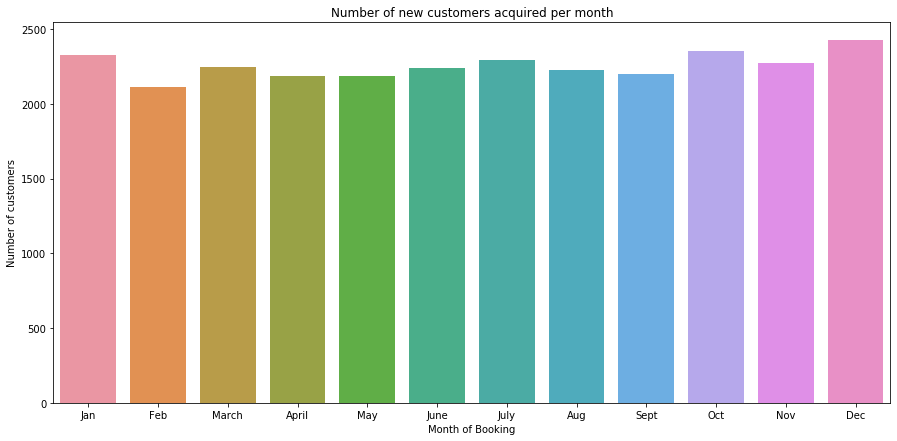

In [485]:
lst1= [g[i] for i in range(1, 13)]

xaxis= ["Jan", "Feb", "March", "April", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]
yaxis= lst1

plt.figure(figsize=(15,7))
sns.barplot(x=xaxis, y= yaxis)
plt.title("Number of new customers acquired per month")
plt.xlabel("Month of Booking")
plt.ylabel("Number of customers")
plt.show()

# Question 2

Calculating Days since start of Booking and first date of Customer's acquisition 

In [486]:
start_date = df.groupby('Profile_ID')['Date_of_Booking'].min()
start_date = start_date.rename("Cust_acquired_Date")
start_date.head()

Profile_ID
1   2018-05-20
2   2018-11-10
3   2018-04-12
4   2018-03-02
5   2018-01-06
Name: Cust_acquired_Date, dtype: datetime64[ns]

In [487]:
df = pd.merge(df, start_date, left_on='Profile_ID', right_index=True)
df.head()


,Transaction_ID,Profile_ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day),sequence,month_of_Booking,Cust_acquired_Date
0,BBCHH,1,2018-05-20,2018-05-21,D,14,0,5,2018-05-20
1,CHWFD,1,2018-09-23,2018-09-23,C,8,1,9,2018-05-20
2,DYDMF,2,2018-11-10,2018-11-13,C,11,0,11,2018-11-10
3,EZYSA,3,2018-04-12,2018-04-16,B,8,0,4,2018-04-12
4,HWAKX,3,2018-08-05,2018-08-06,B,11,1,8,2018-04-12


In [488]:
df['month_of_acquisition'] = df['Cust_acquired_Date'].dt.month
print(df)

      Transaction_ID  Profile_ID Date_of_Booking Date_of_Service_Requested  \
0              BBCHH           1      2018-05-20                2018-05-21   
1              CHWFD           1      2018-09-23                2018-09-23   
2              DYDMF           2      2018-11-10                2018-11-13   
3              EZYSA           3      2018-04-12                2018-04-16   
4              HWAKX           3      2018-08-05                2018-08-06   
...              ...         ...             ...                       ...   
30935          FOXPU       16707      2018-09-29                2018-10-02   
30936          ZNKAO       16708      2018-03-12                2018-03-16   
30937          INBOS       16709      2018-01-05                2018-01-10   
30938          CUNOS       16710      2018-02-26                2018-03-03   
30939          DUBEV       16711      2018-04-30                2018-05-03   

      Source  Slot of Booking (Hour of the Day)  sequence  mont

In [489]:
df1= df[df["month_of_acquisition"] == 12]

lst1 = (df1["Date_of_Booking"] - df1["Cust_acquired_Date"]).dt.days
print(lst1)


8          0
25         0
26       311
35         0
36       135
        ... 
30911    331
30912    332
30913    345
30914    356
30932      0
Length: 9371, dtype: int64


In [490]:
df1['days_since_start'] = lst1
df1.head()
f1 = df1.Profile_ID.nunique()
print("Total new customers acquired in December:",f1)

Total new customers acquired in December: 2424


C:\Users\VISHAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Filtered data to calculate 30 days repeate rate

In [491]:
df2= df1[(df1["days_since_start"] <= 30) & (df1["sequence"] > 0)]
print(len(df2))

595


In [492]:
f2 = df2.Profile_ID.nunique()
print("Total customers with repeat orders in 30 days acquired in December:",f2)

Total customers with repeat orders in 30 days acquired in December: 408


In [493]:
print("30 day repeat rate of users acquired in December:", f2/f1 * 100)

30 day repeat rate of users acquired in December: 16.831683168316832


# Question 3

Calculating days since start for month of January, February and Mach 2018

In [494]:
df3= df[(df["month_of_acquisition"] == 1) | (df["month_of_acquisition"] ==2) | (df["month_of_acquisition"] ==3)]
lst2 = (df3["Date_of_Booking"] - df3["Cust_acquired_Date"]).dt.days
print(lst2)

5          0
6          0
11         0
14         0
15         0
        ... 
30934      0
30935    204
30936      0
30937      0
30938      0
Length: 10144, dtype: int64


In [495]:
df3['days_since_start'] = lst2
df3.head()
g1 = df3.Profile_ID.nunique()
print("Total new customers acquired in Jan, Feb and March:",g1)

Total new customers acquired in Jan, Feb and March: 4931


C:\Users\VISHAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Filtered data to calculate 90 days repeate rate

In [496]:
df4= df3[(df3["days_since_start"] <= 90) & (df3["sequence"] > 0)]
print(len(df4))

1583


In [497]:
g2 = df4.Profile_ID.nunique()
print("Total customers with repeat orders in 90 days acquired in Jan, Feb and March:",g2)

Total customers with repeat orders in 90 days acquired in Jan, Feb and March: 1023


In [498]:
print("90 days repeat rate of users acquired in December:", g2/g1 * 100)

90 days repeat rate of users acquired in December: 20.74629892516731


# Question 4

Preparing data of 90 days repeat for whole dataset

In [499]:
lst = (df["Date_of_Booking"] - df["Cust_acquired_Date"]).dt.days

df['days_since_start'] = lst
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30940 entries, 0 to 30939
Data columns (total 11 columns):
Transaction_ID                       30940 non-null object
Profile_ID                           30940 non-null int64
Date_of_Booking                      30940 non-null datetime64[ns]
Date_of_Service_Requested            30940 non-null datetime64[ns]
Source                               30940 non-null object
Slot of Booking (Hour of the Day)    30940 non-null int64
sequence                             30940 non-null int64
month_of_Booking                     30940 non-null int64
Cust_acquired_Date                   30940 non-null datetime64[ns]
month_of_acquisition                 30940 non-null int64
days_since_start                     30940 non-null int64
dtypes: datetime64[ns](3), int64(6), object(2)
memory usage: 2.8+ MB


In [500]:
df.sort_values(by=['Date_of_Booking'])
print(len(df))

30940


In [501]:
df7= df[(df["days_since_start"] <= 90)]
df7= df7[df7['sequence'] > 0]
print(len(df7))
df7 = df7.assign(check_90_repeat= 1)
print(df7)

4438
      Transaction_ID  Profile_ID Date_of_Booking Date_of_Service_Requested  \
10             LRPOS           8      2018-11-30                2018-11-30   
17             PRFVG          14      2018-06-07                2018-06-07   
18             SFYTJ          14      2018-06-21                2018-06-23   
19             SBKYD          14      2018-06-24                2018-06-29   
20             CJIHM          14      2018-06-29                2018-07-01   
...              ...         ...             ...                       ...   
30877          JUVMX       16693      2018-01-24                2018-01-28   
30878          KYXOV       16693      2018-01-27                2018-02-01   
30879          MSNQH       16693      2018-02-12                2018-02-16   
30923          JMXSR       16699      2018-05-12                2018-05-17   
30929          YKKQV       16702      2018-07-24                2018-07-24   

      Source  Slot of Booking (Hour of the Day)  sequence 

In [502]:
df7.drop(["Transaction_ID", "Date_of_Booking", "Date_of_Service_Requested", "Source", "Slot of Booking (Hour of the Day)", "month_of_Booking", "Cust_acquired_Date", "month_of_acquisition", "days_since_start", "sequence"], axis=1, inplace=True)
df7.head(10)

,Profile_ID,check_90_repeat
10,8,1
17,14,1
18,14,1
19,14,1
20,14,1
31,22,1
54,36,1
66,43,1
71,47,1
72,47,1


In [503]:
df7.drop_duplicates(inplace=True)
df7.head()


,Profile_ID,check_90_repeat
10,8,1
17,14,1
31,22,1
54,36,1
66,43,1


In [504]:
df8 = pd.merge(df, df7, on='Profile_ID',  how='left')
df8

,Transaction_ID,Profile_ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day),sequence,month_of_Booking,Cust_acquired_Date,month_of_acquisition,days_since_start,check_90_repeat
0,BBCHH,1,2018-05-20,2018-05-21,D,14,0,5,2018-05-20,5,0,NaN
1,CHWFD,1,2018-09-23,2018-09-23,C,8,1,9,2018-05-20,5,126,NaN
2,DYDMF,2,2018-11-10,2018-11-13,C,11,0,11,2018-11-10,11,0,NaN
3,EZYSA,3,2018-04-12,2018-04-16,B,8,0,4,2018-04-12,4,0,NaN
4,HWAKX,3,2018-08-05,2018-08-06,B,11,1,8,2018-04-12,4,115,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
30935,FOXPU,16707,2018-09-29,2018-10-02,C,18,1,9,2018-03-09,3,204,NaN
30936,ZNKAO,16708,2018-03-12,2018-03-16,A,13,0,3,2018-03-12,3,0,NaN
30937,INBOS,16709,2018-01-05,2018-01-10,C,14,0,1,2018-01-05,1,0,NaN
30938,CUNOS,16710,2018-02-26,2018-03-03,C,19,0,2,2018-02-26,2,0,NaN


## Data Wrangling

In [505]:
df8['check_90_repeat'] = df8['check_90_repeat'].fillna(0)

In [506]:
df8['check_90_repeat'] = df8['check_90_repeat'].astype(int)
df8.describe()

,Profile_ID,Slot of Booking (Hour of the Day),sequence,month_of_Booking,month_of_acquisition,days_since_start,check_90_repeat
count,30940.000000,30940.000000,30940.000000,30940.000000,30940.000000,30940.000000,30940.000000
mean,8329.657854,13.060440,2.145734,6.554622,6.810504,71.000840,0.439948
std,4807.274974,3.135142,4.571598,3.475711,4.305393,100.837716,0.496389
min,1.000000,6.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,4142.750000,12.000000,0.000000,4.000000,3.000000,0.000000,0.000000
50%,8375.000000,14.000000,0.000000,7.000000,6.000000,0.000000,0.000000
75%,12432.000000,14.000000,2.000000,10.000000,12.000000,134.000000,1.000000
max,16711.000000,19.000000,55.000000,12.000000,12.000000,364.000000,1.000000


In [507]:
df8.isnull().sum()

Transaction_ID                       0
Profile_ID                           0
Date_of_Booking                      0
Date_of_Service_Requested            0
Source                               0
Slot of Booking (Hour of the Day)    0
sequence                             0
month_of_Booking                     0
Cust_acquired_Date                   0
month_of_acquisition                 0
days_since_start                     0
check_90_repeat                      0
dtype: int64

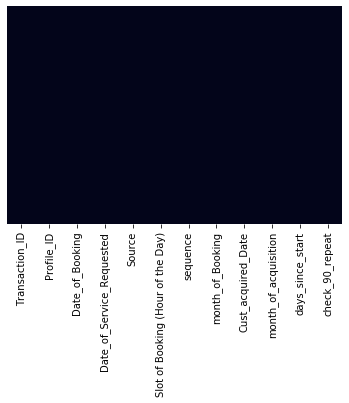

In [508]:
sns.heatmap(df8.isnull(), yticklabels= False, cbar=False)

## EDA

Text(0.5, 1.0, 'Number of 90 days non repeated customers vs repeated customers')

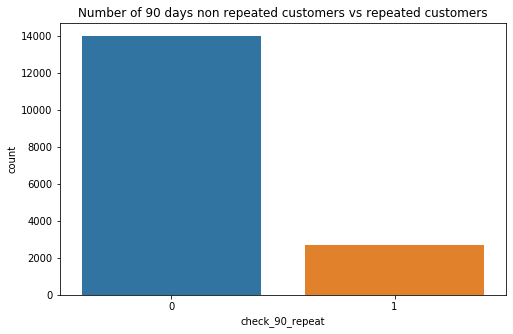

In [509]:
plt.figure(figsize=(8,5))
sns.countplot(x="check_90_repeat", data= df8[(df8["sequence"] == 0)])
plt.title("Number of 90 days non repeated customers vs repeated customers")

Text(0.5, 1.0, '90 days non repeated customers vs repeated customers acquired from different Sources')

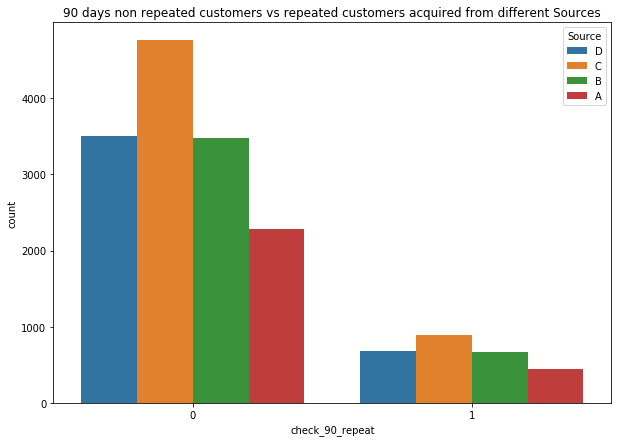

In [510]:
plt.figure(figsize=(10, 7))
sns.countplot(x= "check_90_repeat", hue= "Source", data= df8[(df8["sequence"] == 0)])
plt.title("90 days non repeated customers vs repeated customers acquired from different Sources")

# Creating Training data

In [511]:
train_data= df8[(df8["sequence"] == 0) & (df8["month_of_acquisition"] != 11)]
train_data.describe()

,Profile_ID,Slot of Booking (Hour of the Day),sequence,month_of_Booking,month_of_acquisition,days_since_start,check_90_repeat
count,15696.000000,15696.000000,15696.0,15696.000000,15696.000000,15696.0,15696.000000
mean,8345.836583,13.064348,0.0,6.089832,6.089832,0.0,0.170808
std,4824.572936,3.150580,0.0,3.674450,3.674450,0.0,0.376353
min,1.000000,6.000000,0.0,1.000000,1.000000,0.0,0.000000
25%,4151.750000,11.000000,0.0,3.000000,3.000000,0.0,0.000000
50%,8342.500000,14.000000,0.0,6.000000,6.000000,0.0,0.000000
75%,12525.250000,14.000000,0.0,9.000000,9.000000,0.0,0.000000
max,16711.000000,19.000000,0.0,12.000000,12.000000,0.0,1.000000


In [512]:
lst_gap = (train_data["Date_of_Service_Requested"] - train_data["Date_of_Booking"]).dt.days
print(lst_gap)
train_data['Gap_Booking_Service'] = lst_gap
train_data

0        1
3        4
5        3
6        1
7        3
        ..
30934    1
30936    4
30937    5
30938    5
30939    3
Length: 15696, dtype: int64


C:\Users\VISHAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Transaction_ID,Profile_ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day),sequence,month_of_Booking,Cust_acquired_Date,month_of_acquisition,days_since_start,check_90_repeat,Gap_Booking_Service
0,BBCHH,1,2018-05-20,2018-05-21,D,14,0,5,2018-05-20,5,0,0,1
3,EZYSA,3,2018-04-12,2018-04-16,B,8,0,4,2018-04-12,4,0,0,4
5,YRKFO,4,2018-03-02,2018-03-05,A,13,0,3,2018-03-02,3,0,0,3
6,JSFWY,5,2018-01-06,2018-01-07,C,14,0,1,2018-01-06,1,0,0,1
7,GTLXK,6,2018-07-18,2018-07-21,B,13,0,7,2018-07-18,7,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30934,SXRYD,16707,2018-03-09,2018-03-10,B,14,0,3,2018-03-09,3,0,0,1
30936,ZNKAO,16708,2018-03-12,2018-03-16,A,13,0,3,2018-03-12,3,0,0,4
30937,INBOS,16709,2018-01-05,2018-01-10,C,14,0,1,2018-01-05,1,0,0,5
30938,CUNOS,16710,2018-02-26,2018-03-03,C,19,0,2,2018-02-26,2,0,0,5


# Converting String values to categorical values

In [513]:
source= pd.get_dummies(train_data["Source"], drop_first= True)
source.head(5)

,B,C,D
0,0,0,1
3,1,0,0
5,0,0,0
6,0,1,0
7,1,0,0


In [514]:
train_data= pd.concat([train_data, source], axis=1)


In [515]:
train_data.drop(["Profile_ID", "sequence", "days_since_start", "Transaction_ID", "Date_of_Booking", "Date_of_Service_Requested", "Source", "month_of_Booking", "Cust_acquired_Date", "month_of_acquisition"], axis=1, inplace= True)

In [516]:
train_data.describe()

,Slot of Booking (Hour of the Day),check_90_repeat,Gap_Booking_Service,B,C,D
count,15696.000000,15696.000000,15696.000000,15696.000000,15696.000000,15696.000000
mean,13.064348,0.170808,2.509620,0.247898,0.338112,0.251147
std,3.150580,0.376353,1.706061,0.431806,0.473082,0.433687
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,14.000000,0.000000,3.000000,0.000000,0.000000,0.000000
75%,14.000000,0.000000,4.000000,0.000000,1.000000,1.000000
max,19.000000,1.000000,5.000000,1.000000,1.000000,1.000000


In [517]:
train_data.head()

,Slot of Booking (Hour of the Day),check_90_repeat,Gap_Booking_Service,B,C,D
0,14,0,1,0,0,1
3,8,0,4,1,0,0
5,13,0,3,0,0,0
6,14,0,1,0,1,0
7,13,0,3,1,0,0


In [518]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15696 entries, 0 to 30939
Data columns (total 6 columns):
Slot of Booking (Hour of the Day)    15696 non-null int64
check_90_repeat                      15696 non-null int32
Gap_Booking_Service                  15696 non-null int64
B                                    15696 non-null uint8
C                                    15696 non-null uint8
D                                    15696 non-null uint8
dtypes: int32(1), int64(2), uint8(3)
memory usage: 475.2 KB


## Train Data

In [519]:
X= train_data.drop("check_90_repeat", axis=1)

y= train_data["check_90_repeat"]

# Logistic Regression

In [520]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [521]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 42)

In [522]:
logmodel= LogisticRegression()

In [523]:
logmodel.fit(X_train, y_train)

C:\Users\VISHAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [524]:
L_prediction= logmodel.predict(X_test)

## Precision, Recall, Confusion Matrix

In [525]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [526]:
print(classification_report(y_test, L_prediction))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      3903
           1       0.00      0.00      0.00       806

    accuracy                           0.83      4709
   macro avg       0.41      0.50      0.45      4709
weighted avg       0.69      0.83      0.75      4709



C:\Users\VISHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [527]:
print(confusion_matrix(y_test, L_prediction))


[[3903    0]
 [ 806    0]]


In [528]:
lra= accuracy_score(y_test, L_prediction)
print(lra)

0.8288383945636016


## Decision Trees Classifier

In [529]:
from sklearn.tree import DecisionTreeClassifier

In [530]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth= 3, min_samples_leaf= 5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [565]:
# Making Prediction
D_pred = clf_gini.predict(X_test)

#Classification report
print(classification_report(y_test, D_pred))


#confusion matrix
c = confusion_matrix(y_test, D_pred)
print(c)

# Over all accuarcy
dta = (c[0,0]+c[1,1])/np.sum(c)
print(dta)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      3903
           1       0.00      0.00      0.00       806

    accuracy                           0.83      4709
   macro avg       0.41      0.50      0.45      4709
weighted avg       0.69      0.83      0.75      4709

[[3903    0]
 [ 806    0]]
0.8288383945636016


C:\Users\VISHAL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Random Forest Classifier

In [318]:
from sklearn.ensemble import RandomForestClassifier

In [545]:
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
rf.fit(X_train,y_train)

# Making Prediction
Rf_pred = rf.predict(X_test)
cm = confusion_matrix(y_test,Rf_pred)
print('confusion matrix:\n',cm)

#calculating accuracy
rfa = accuracy_score(y_test,Rf_pred)
print('accuracy score = ',accuracy_score(y_test,Rf_pred))

confusion matrix:
 [[3896    7]
 [ 803    3]]
accuracy score =  0.8279889573157783


In [566]:
#Classification report
print(classification_report(y_test, Rf_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      3903
           1       0.30      0.00      0.01       806

    accuracy                           0.83      4709
   macro avg       0.56      0.50      0.46      4709
weighted avg       0.74      0.83      0.75      4709



# Gradient Boost Classifier

In [546]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier



In [547]:
md = GradientBoostingClassifier(n_estimators = 1000, learning_rate = 0.01, max_depth = 16, subsample = 0.5)
md.fit(X_train, y_train)

Boost_pred= md.predict(X_test)

conf = confusion_matrix(y_test,Boost_pred)
print('confusion matrix:\n',conf)


gba = accuracy_score(y_test,Boost_pred)
print('accuracy score = ',accuracy_score(y_test,Boost_pred))

confusion matrix:
 [[3899    4]
 [ 804    2]]
accuracy score =  0.82841367593969


In [567]:
#Classification report
print(classification_report(y_test, Boost_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      3903
           1       0.33      0.00      0.00       806

    accuracy                           0.83      4709
   macro avg       0.58      0.50      0.46      4709
weighted avg       0.74      0.83      0.75      4709



## comparing accuracies

<BarContainer object of 4 artists>

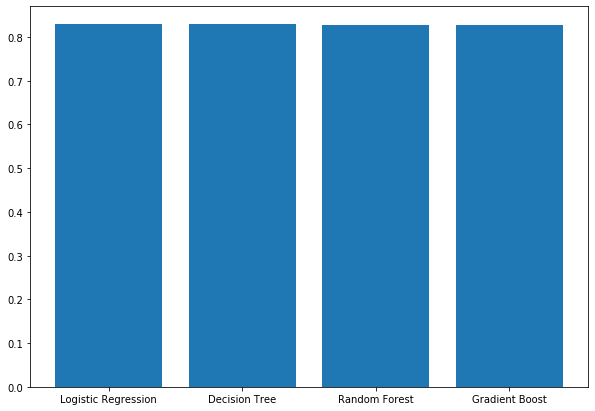

In [548]:

plt.figure(figsize= (10,7))
ac = [lra, dta, rfa, gba]
name = ['Logistic Regression','Decision Tree', 'Random Forest', 'Gradient Boost']
plt.bar(name, ac)

# Predicting for November 2018

In [553]:
prod_data= df8[(df8["sequence"] == 0) & (df8["month_of_acquisition"] == 11)]

In [554]:
lst_gap1 = (prod_data["Date_of_Service_Requested"] - prod_data["Date_of_Booking"]).dt.days
print(lst_gap1)
prod_data['Gap_Booking_Service'] = lst_gap1


2        3
9        0
29       0
124      1
158      2
        ..
30727    1
30854    0
30858    4
30859    2
30915    4
Length: 1015, dtype: int64


C:\Users\VISHAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [555]:
source1= pd.get_dummies(prod_data["Source"], drop_first= True)
source1.head(5)

,B,C,D
2,0,1,0
9,0,1,0
29,1,0,0
124,0,1,0
158,0,0,1


In [556]:
prod_data2= pd.concat([prod_data, source1], axis=1)
prod_data.drop(["check_90_repeat"], axis=1, inplace=True)

In [557]:
prod_data2.drop(["Profile_ID","check_90_repeat", "sequence", "days_since_start", "Transaction_ID", "Date_of_Booking", "Date_of_Service_Requested", "Source", "month_of_Booking", "Cust_acquired_Date", "month_of_acquisition"], axis=1, inplace= True)

In [558]:
prod_data2.head()

,Slot of Booking (Hour of the Day),Gap_Booking_Service,B,C,D
2,11,3,0,1,0
9,10,0,0,1,0
29,8,0,1,0,0
124,14,1,0,1,0
158,6,2,0,0,1


Predicting using Random Forest Classifier

In [559]:
Rf_pred2 = rf.predict(prod_data2)
print(Rf_pred2)

[0 0 0 ... 0 0 0]


In [560]:
prod_data['Prediction_output'] = Rf_pred2

prod_data.describe()

C:\Users\VISHAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Profile_ID,Slot of Booking (Hour of the Day),sequence,month_of_Booking,month_of_acquisition,days_since_start,Gap_Booking_Service,Prediction_output
count,1015.000000,1015.000000,1015.0,1015.0,1015.0,1015.0,1015.000000,1015.000000
mean,8513.167488,13.175369,0.0,11.0,11.0,0.0,2.428571,0.002956
std,4817.983252,3.112738,0.0,0.0,0.0,0.0,1.706402,0.054312
min,2.000000,6.000000,0.0,11.0,11.0,0.0,0.000000,0.000000
25%,4651.500000,12.000000,0.0,11.0,11.0,0.0,1.000000,0.000000
50%,8548.000000,14.000000,0.0,11.0,11.0,0.0,2.000000,0.000000
75%,12628.000000,14.000000,0.0,11.0,11.0,0.0,4.000000,0.000000
max,16694.000000,19.000000,0.0,11.0,11.0,0.0,5.000000,1.000000


# Question 5

Filtered data with Profile_ID's having 90 days repeat

In [561]:
newdf= df[(df["days_since_start"] <= 90)]
newdf.sort_values(by=['Profile_ID'])
newdf.describe()

,Profile_ID,Slot of Booking (Hour of the Day),sequence,month_of_Booking,month_of_acquisition,days_since_start
count,21149.000000,21149.000000,21149.000000,21149.000000,21149.000000,21149.000000
mean,8332.296468,13.058253,0.396236,5.991300,6.499267,9.328810
std,4820.383440,3.144104,1.076327,3.757462,3.947147,21.780637
min,1.000000,6.000000,0.000000,1.000000,1.000000,0.000000
25%,4157.000000,12.000000,0.000000,3.000000,3.000000,0.000000
50%,8362.000000,14.000000,0.000000,5.000000,6.000000,0.000000
75%,12469.000000,14.000000,0.000000,9.000000,10.000000,0.000000
max,16711.000000,19.000000,15.000000,12.000000,12.000000,90.000000


Took count of Profile ID's to store the data of number of times they repeated

In [562]:
newdf2= newdf.groupby(['Profile_ID']).size().reset_index(name='counts')
newdf2.head()

,Profile_ID,counts
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [563]:
newdf4= newdf2[(newdf2["counts"]>1)]
newdf4.head(20)

,Profile_ID,counts
7,8,2
13,14,5
21,22,2
35,36,2
42,43,2
46,47,5
47,48,2
51,52,3
54,55,2
65,66,2


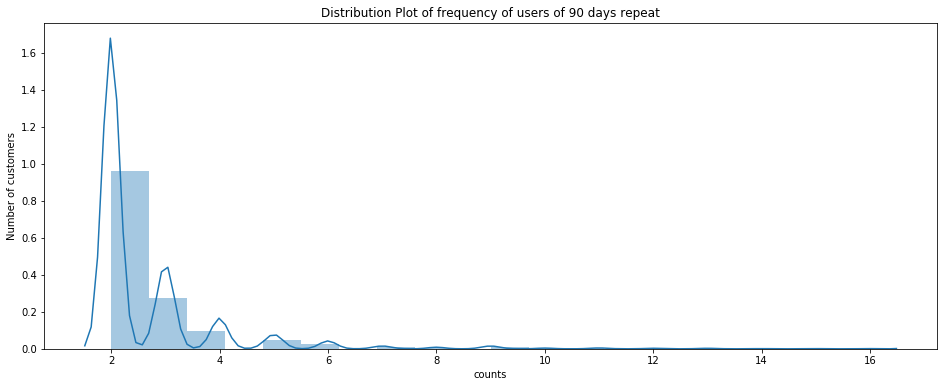

In [564]:
plt.figure(1, figsize=(16, 6))
sns.distplot(newdf4['counts'], bins=20)
plt.ylabel("Number of customers")   
plt.title("Distribution Plot of frequency of users of 90 days repeat")
plt.show();